### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

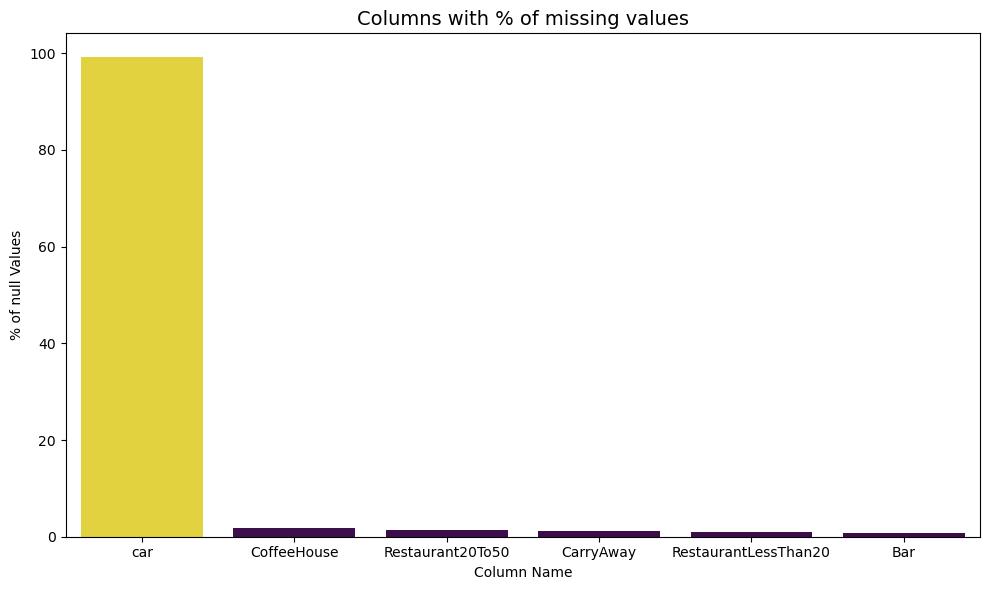

In [36]:
# Information about the columns in the dataset
data.info()
# check the columns with missing values (null)
null_values = data.isnull().mean() * 100
columns_null_values = null_values[null_values>0].sort_values(ascending=False)

columns_null_values_df = columns_null_values.reset_index()
columns_null_values_df.columns = ['Column', 'MissingCount']

print(f' Columns with missing values:\n {columns_null_values_df}')

plt.figure(figsize=(10, 6))
# sns.barplot(x=columns_null_values.index, y=columns_null_values.values,hue='x',  palette="viridis", legend=False)
sns.barplot(
    data=columns_null_values_df,
    x='Column',
    y='MissingCount',
    hue='MissingCount',      
    palette='viridis',
    legend=False             
)
# plt.yscale('log')
plt.title("Columns with % of missing values", fontsize=14)
plt.ylabel("% of null Values")
plt.xlabel("Column Name")
plt.tight_layout()
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [32]:
#  nearly 98% of the values for the column car are null , remove that column from the data set.
clean_data = data.drop(columns=['car'])
# total nummber of columns should be 24 now
clean_data.info()
#  replace nul with UNKNOWN
clean_data = clean_data.fillna('UNKNOWN')
clean_data.head()
print(f'Number of columns with null values{np.sum(clean_data.isnull().sum())}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [39]:
# calculate the % for the colummn Y
coupon_accept_rate = clean_data['Y'].mean()*100
print(f' Coupon acceptance rate: {coupon_accept_rate:.2f}')

 Coupon acceptance rate: 56.84


5. Use a bar plot to visualize the `coupon` column.

coupons counts:
                  coupon  count
0           Coffee House   3996
1        Restaurant(<20)   2786
2  Carry out & Take away   2393
3                    Bar   2017
4      Restaurant(20-50)   1492


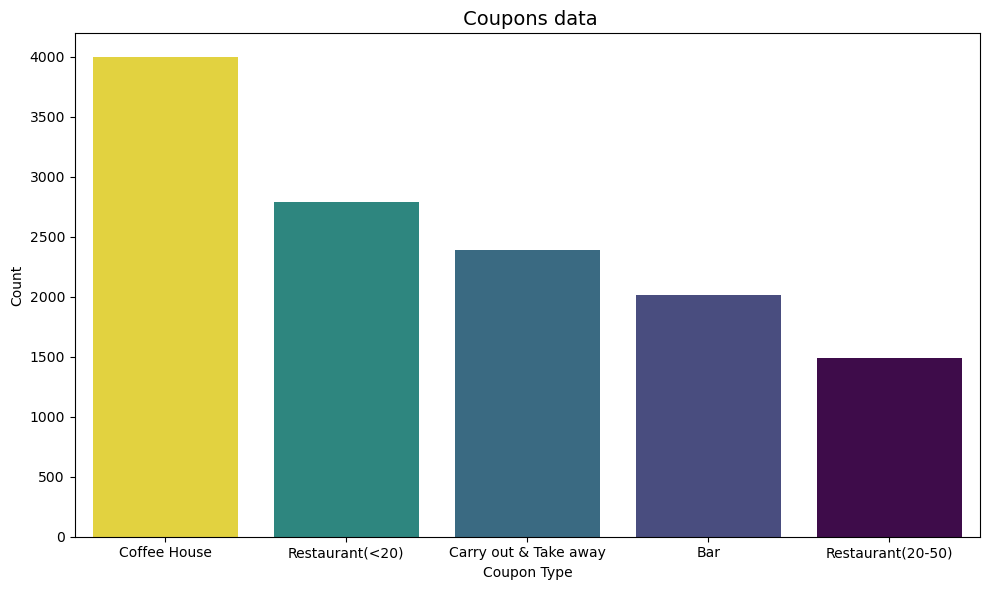

In [47]:
# check the coupons data
coupons_df = clean_data['coupon'].value_counts().reset_index()
coupons_df.columns = ['coupon', 'count']
coupons_df = coupons_df.sort_values('count',ascending=False)
print(f'coupons counts:\n{coupons_df}')

plt.figure(figsize=(10, 6))

sns.barplot(
    data=coupons_df,
    x='coupon',
    y='count',
    hue='count',      
    palette='viridis',
    legend=False             
)
# plt.yscale('log')
plt.title(" Coupons data", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Coupon Type")
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

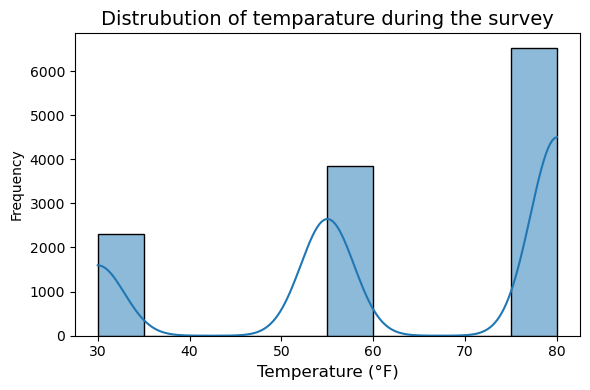

In [50]:
# Histogram of temperature
plt.figure(figsize=(6, 4))

sns.histplot(
    data=clean_data['temperature'],
    bins=10,
    kde=True
)

plt.title(" Distrubution of temparature during the survey ", fontsize=14)
plt.ylabel("Frequency")
plt.xlabel("Temperature (°F)", fontsize=12)
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [65]:
bar_coupons_df = data[data['coupon']=='Bar']
print(f' bar coupons data:{bar_coupons_df.shape}')
bar_coupons_df.head()

 bar coupons data:(2017, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [58]:
bar_coupon_accptance_rate = bar_coupons_df['Y'].mean()*100
print(f' Bar coupon acceptance rate:{bar_coupon_accptance_rate:.2f}')

 Bar coupon acceptance rate:41.00


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [83]:
print(f' Bar visit values:{bar_coupons_df['Bar'].unique()}')
#  bar visits more than 3
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['gt8', '4~8'])]
#  bar visist less than or equal to 3
bar_less_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['never','less1','1~3' ])]

# calclulate acceptance rate
accept_rate_bar_visits_lte_3 =  bar_less_than_3['Y'].mean() * 100
accept_rate_bar_visits_gt_3 =  bar_more_than_3['Y'].mean() * 100

print(f' Coupon acceptance rate of people with 3 or fewer bar visits:{accept_rate_bar_visits_lte_3:.2f}%')
print(f' Coupon acceptance rate of people with more than 3 bar visits:{accept_rate_bar_visits_gt_3:.2f}%')


 Bar visit values:['never' 'less1' '1~3' 'gt8' nan '4~8']
 Coupon acceptance rate of people with 3 or fewer bar visits:37.06%
 Coupon acceptance rate of people with more than 3 bar visits:76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


age values:[21 46 26 31 41 50 36 20]
 Coupon acceptance rate for drivers who visit bar more than once and over the age of 25:69.52%
 Coupon acceptance rate for all other drivers with bar coupon:33.50%


/var/folders/hs/qx219h5x6rdfpczx1__xkxt80000gq/T/ipykernel_96006/3408342011.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


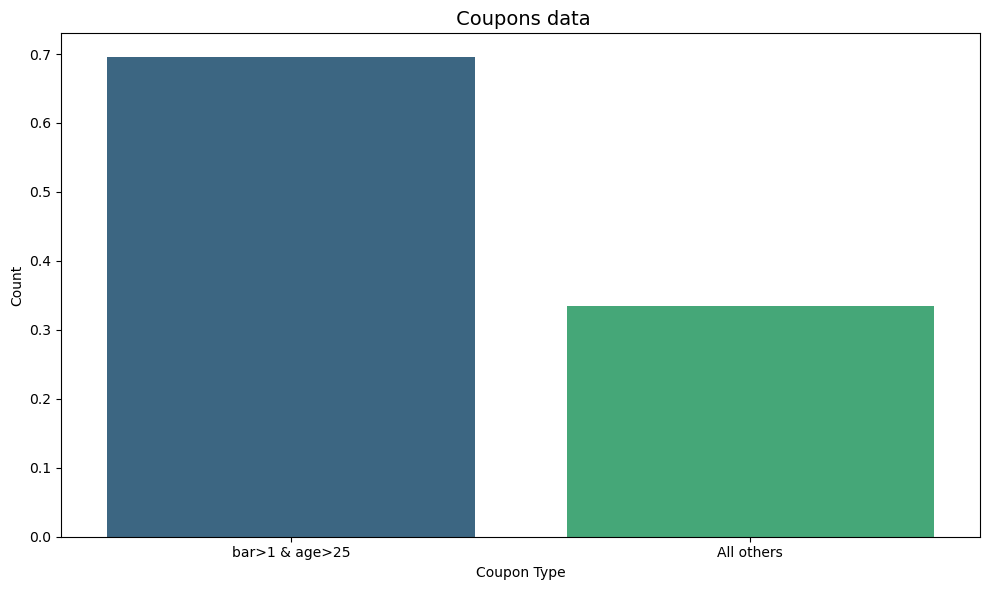

In [104]:
#  convert age vallues to numeric values
print(f'age values:{bar_coupons_df['age'].unique()}')
age_map = {'below21':20,
           '21':21,
           '26':26,
           '31':31,           
           '36':36,
           '41':41,
           '46':46 ,
           '50plus':50}

# filter the bar coupons data for the drivers who visist bar more than once 
bar_more_than_once = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3','gt8', '4~8' ])].copy()
# convert the age to numeric values
bar_more_than_once['age'] = bar_more_than_once['age'].replace(age_map).infer_objects(copy=False)
# filter the drivers with age < 25
over_25 = bar_more_than_once[(bar_more_than_once['age']>25) ]
all_other = bar_coupons_df.drop(over_25.index)
# calculate acceptance rate
acceptance_rate_over25_more_than_once = over_25['Y'].mean()
acceptance_rate_others = all_other['Y'].mean()

print(f' Coupon acceptance rate for drivers who visit bar more than once and over the age of 25:{acceptance_rate_over25_more_than_once:.2%}')
print(f' Coupon acceptance rate for all other drivers with bar coupon:{acceptance_rate_others:.2%}')

plt.figure(figsize=(10, 6))

sns.barplot(   
    x=['bar>1 & age>25','All others'],
    y=[acceptance_rate_over25_more_than_once, acceptance_rate_others],
    palette='viridis'
)
# plt.yscale('log')
plt.title(" Coupon Acceptance Rate of Frq", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Coupon Type")
plt.tight_layout()
plt.show()



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [116]:
# filter the bar coupons data for the drivers who visist bar more than once 
bar_more_than_once = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3','gt8', '4~8' ])]
# Filter passengers not a kid and occupation not farming, fishing, or forestry.
filtered_group = bar_more_than_once[(bar_more_than_once['passanger'] != 'Kid(s)') & 
                                        ~(bar_more_than_once['occupation'].isin(['Farming Fishing & Forestry']))]

all_other_group = bar_coupons_df.drop(filtered_group.index)
acceptace_rate_group_1 =  filtered_group['Y'].mean() 
acceptace_rate_all_other_group = all_other_group['Y'].mean() 

print(f"Acceptance rate for drivers who go to bars more than once, no kids passengers and non-Farming Fishing & Forestry occupation: {acceptace_rate_group_1:.2%}")
print(f"Acceptance rate for all other drivers with bar coupon: {acceptace_rate_all_other_group:.2%}")

Acceptance rate for drivers who go to bars more than once, no kids passengers and non-Farming Fishing & Forestry occupation: 71.32%
Acceptance rate for all other drivers with bar coupon: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [124]:
print(f'age values:{bar_coupons_df['age'].unique()}')
age_map = {'below21':20,
           '21':21,
           '26':26,
           '31':31,           
           '36':36,
           '41':41,
           '46':46 ,
           '50plus':50}
bar_coupons_df_copy = bar_coupons_df.copy()
# convert the age to numeric values
bar_coupons_df_copy['age'] = bar_coupons_df_copy['age'].replace(age_map).infer_objects(copy=False)
#  group with condition 1
cond_1_group = bar_coupons_df_copy[ (bar_coupons_df_copy['Bar'].isin(['1~3','gt8', '4~8' ])) &
                                    (bar_coupons_df_copy['passanger'] != 'Kid(s)') & 
                                    (bar_coupons_df_copy['maritalStatus'] != 'Widowed')]
accept_rate_group_1 = cond_1_group['Y'].mean()

#  group with condition 1
cond_2_group = bar_coupons_df_copy[ (bar_coupons_df_copy['Bar'].isin(['1~3','gt8', '4~8' ])) &
                                    (bar_coupons_df_copy['age'] < 30) ]
accept_rate_group_2 = cond_2_group['Y'].mean()

#  group with condition 3
cond_3_group = bar_coupons_df_copy[ (bar_coupons_df_copy['RestaurantLessThan20'].isin(['gt8', '4~8' ])) &
                                    ~(bar_coupons_df_copy['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])) ]                                    

accept_rate_group_3 = cond_3_group['Y'].mean()
print(f'Coupon acceptance rate: group1 (go to bars more than once a month, no kid passenger and were not widowed) : {accept_rate_group_1:.2%}')
print(f'Coupon acceptance rate: group1 (go to bars more than once a month and are under the age of 30 ) : {accept_rate_group_2:.2%}')
print(f'Coupon acceptance rate: group1 (go to cheap restaurants more than 4 times a month and income is less than 50K) : {accept_rate_group_3:.2%}')

age values:[21 46 26 31 41 50 36 20]
Coupon acceptance rate: group1 (go to bars more than once a month, no kid passenger and were not widowed) : 71.32%
Coupon acceptance rate: group1 (go to bars more than once a month and are under the age of 30 ) : 72.17%
Coupon acceptance rate: group1 (go to cheap restaurants more than 4 times a month and income is less than 50K) : 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [147]:
print(
    """
    Hypothesis:
    Drivers who are ferquently visit the bars are more like to accept the bar coupons than others. 
    Other factors like age younger 30 , with out kid passenger, not widowed and higher income levels lead to higher acceptance rate of bar coupons.
    Drivers with lower income and who frequent cheaper restaurents more unlikely to accept the bar coupons.    
    """)


    Hypothesis:
    Drivers who are ferquently visit the bars are more like to accept the bar coupons than others. 
    Other factors like age younger 30 , with out kid passenger, not widowed and higher income levels lead to higher acceptance rate of bar coupons.
    Drivers with lower income and who frequent cheaper restaurents more unlikely to accept the bar coupons.    
    


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [141]:
#  Coffe house coupons data analysis
#  filter coffe house coupons
coffe_coupons = data[data['coupon']=='Coffee House'].copy()
print(f' coffee coupons data:{coffe_coupons.shape}')
# Coffe house coupons acceptance rate
coffee_coupons_accept_rate = coffe_coupons['Y'].mean()
print(f"Coffee House coupon acceptance rate: {coffee_coupons_accept_rate:.2%}")

 coffee coupons data:(3996, 26)
Coffee House coupon acceptance rate: 49.92%


 coffe house visit values:['never' 'less1' '4~8' '1~3' 'gt8' nan]
Acceptance rate by CoffeeHouse visit frequency:
 visit frequency vs acceptance:CoffeeHouse
4~8      0.685874
gt8      0.657895
1~3      0.647793
less1    0.481860
never    0.188781
Name: Y, dtype: float64


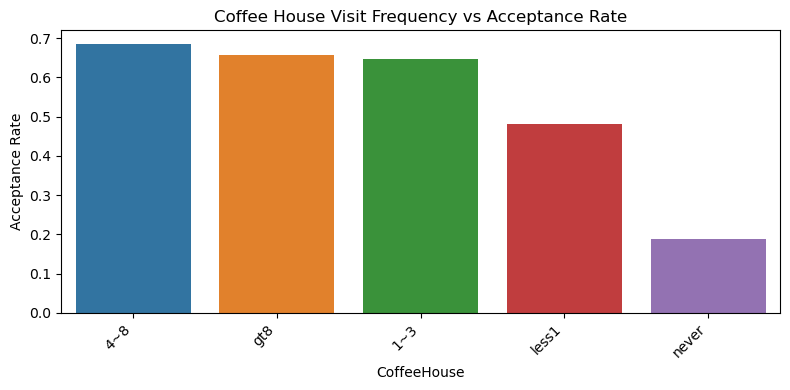

In [142]:
# Acceptancy rate based on coffe house visits
print(f' coffe house visit values:{coffe_coupons['CoffeeHouse'].unique()}')
coffe_visit_freq_accept_rate = coffe_coupons.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by CoffeeHouse visit frequency:")
print(f' visit frequency vs acceptance:{coffe_visit_freq_accept_rate}')

plt.figure(figsize=(8, 4))
sns.barplot(x=coffe_visit_freq_accept_rate.index, y=coffe_visit_freq_accept_rate.values, hue=coffe_visit_freq_accept_rate.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Coffee House Visit Frequency vs Acceptance Rate')
plt.tight_layout()
plt.show()

Acceptance rate by age:
 visit frequency vs acceptance:age
below21    0.696774
21         0.524349
26         0.514828
46         0.513636
41         0.501538
31         0.476726
36         0.467662
50plus     0.420183
Name: Y, dtype: float64


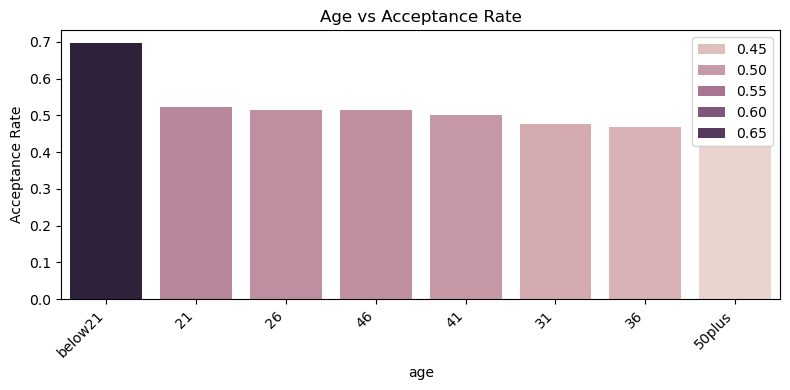

In [144]:
# Acceptancy rate based on age
coffe_visit_age_accept_rate = coffe_coupons.groupby('age')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by age:")
print(f' visit frequency vs acceptance:{coffe_visit_age_accept_rate}')

plt.figure(figsize=(8, 4))
sns.barplot(x=coffe_visit_age_accept_rate.index, y=coffe_visit_age_accept_rate.values, hue=coffe_visit_age_accept_rate.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Age vs Acceptance Rate')
plt.tight_layout()
plt.show()

Acceptance rate by destination:
 visit frequency vs acceptance:destination
No Urgent Place    0.580974
Work               0.445783
Home               0.362069
Name: Y, dtype: float64


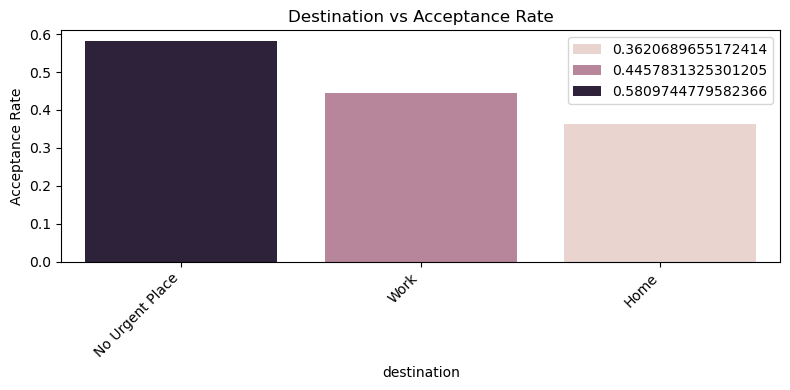

In [145]:
# Acceptancy rate by destination
coffe_visit_dest_accept_rate = coffe_coupons.groupby('destination')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by destination:")
print(f' visit frequency vs acceptance:{coffe_visit_dest_accept_rate}')

plt.figure(figsize=(8, 4))
sns.barplot(x=coffe_visit_dest_accept_rate.index, y=coffe_visit_dest_accept_rate.values, hue=coffe_visit_dest_accept_rate.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Destination vs Acceptance Rate')
plt.tight_layout()
plt.show()

In [146]:
# Hypothesis
print(
    """
    From the analysis of coffe house coupon data:    
    1. Drivers who visit coffe shop more frequently have higher acceptance rate..
    2. Younger driver ( below 20) are more likely to accept the coupons than others.
    3. Drivers with leisure destinations( non home/office) are more likely to accept the coupons.
    """)


    From the analysis of coffe house coupon data:    
    1. Drivers who visit coffe shop more frequently have higher acceptance rate..
    2. Younger driver ( below 20) are more likely to accept the coupons than others.
    3. Drivers with leisure destinations( non home/office) are more likely to accept the coupons.
    
